# Linear Regression from Scratch

This notebook implements linear regression using pure NumPy.

Objectives:
- understand linear models mathematically
- visualize predictions and errors
- interpret learning as loss minimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

This represents the true model
* y = 4 + 3x + ε

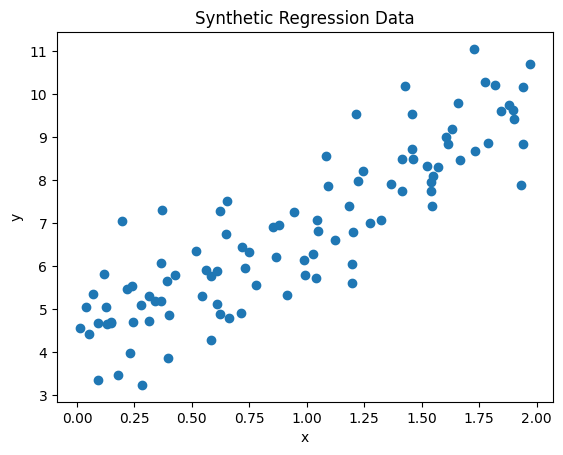

In [3]:
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Regression Data")
plt.show()

In [4]:
X_b = np.c_[np.ones((m, 1)), X]  # add bias term

In [5]:
theta = np.random.randn(2, 1)
theta

array([[0.01300189],
       [1.45353408]])

In [6]:
y_pred = X_b @ theta

In [7]:
y_pred.shape

(100, 1)

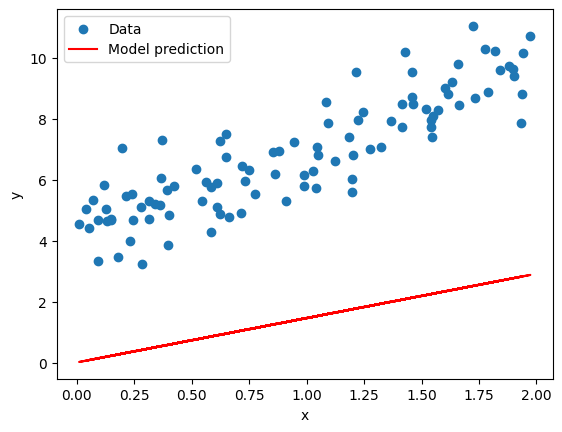

In [8]:
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color="red", label="Model prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [9]:
def mse(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

In [10]:
mse(y, y_pred)

np.float64(31.009348571941214)

In [11]:
theta0_vals = np.linspace(0, 8, 100)
theta1_vals = np.linspace(0, 6, 100)

loss_surface = np.zeros((100, 100))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        theta_test = np.array([[theta0], [theta1]])
        y_test_pred = X_b @ theta_test
        loss_surface[i, j] = mse(y, y_test_pred)

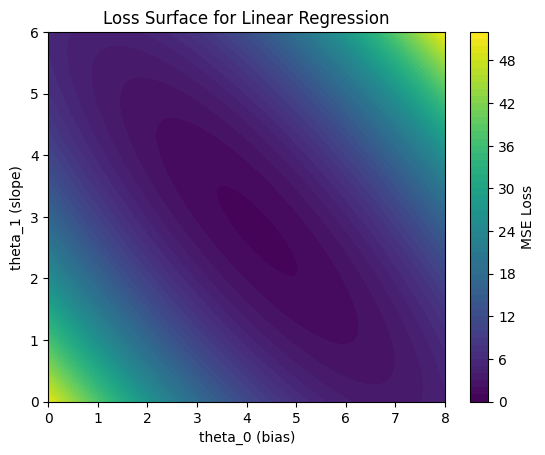

In [12]:
plt.contourf(theta0_vals, theta1_vals, loss_surface.T, levels=50, cmap="viridis")
plt.xlabel("theta_0 (bias)")
plt.ylabel("theta_1 (slope)")
plt.colorbar(label="MSE Loss")
plt.title("Loss Surface for Linear Regression")
plt.show()

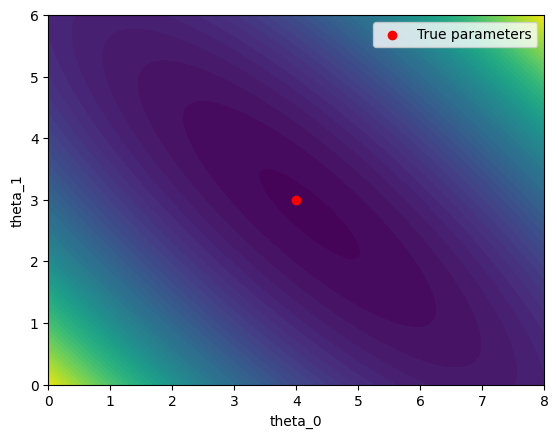

In [13]:
true_theta0 = 4
true_theta1 = 3

plt.contourf(theta0_vals, theta1_vals, loss_surface.T, levels=50, cmap="viridis")
plt.scatter(true_theta0, true_theta1, color="red", label="True parameters")
plt.xlabel("theta_0")
plt.ylabel("theta_1")
plt.legend()
plt.show()

In [14]:
loss_surface

array([[50.00830364, 49.11779865, 48.23636428, ...,  5.86217275,
         5.85151887,  5.84993563],
       [48.9126107 , 48.03131647, 47.15909287, ...,  5.65992397,
         5.65848086,  5.66610837],
       [47.82997766, 46.95789419, 46.09488135, ...,  5.47073507,
         5.47850273,  5.49534101],
       ...,
       [ 4.53294501,  4.53588417,  4.54789395, ..., 47.05089717,
        47.93368745, 48.82554836],
       [ 4.70406158,  4.7162115 ,  4.73743205, ..., 48.11545789,
        49.00745894, 49.90853061],
       [ 4.88823804,  4.90959873,  4.94003004, ..., 49.19307851,
        50.09429032, 51.00457276]], shape=(100, 100))

In [15]:
eta = 0.1 # learning rate
n_iterations = 50 # number of steps

In [16]:
theta = np.random.randn(2, 1)
theta

array([[-0.26465683],
       [ 2.72016917]])

In [17]:
theta_history = []
loss_history = []

for iteration in range(n_iterations):
    y_pred = X_b @ theta
    gradient = 2/m * X_b.T @ (y_pred - y)
    theta = theta - eta * gradient

    theta_history.append(theta.copy())
    loss_history.append(mse(y, y_pred))

In [18]:
theta, loss_history[-1]

(array([[3.7717035],
        [3.161605 ]]),
 np.float64(0.8702060739977513))

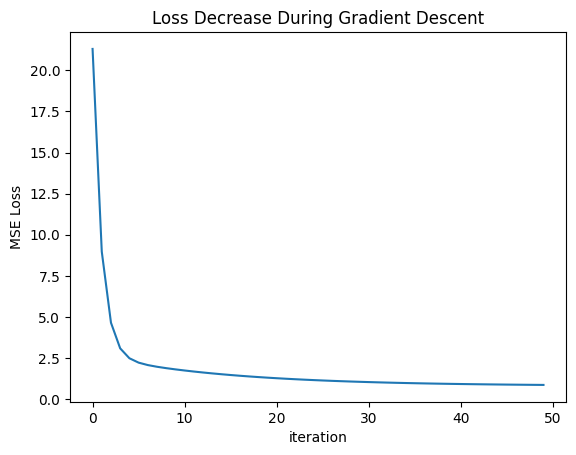

In [19]:
plt.plot(loss_history)
plt.xlabel("iteration")
plt.ylabel("MSE Loss")
plt.title("Loss Decrease During Gradient Descent")
plt.show()

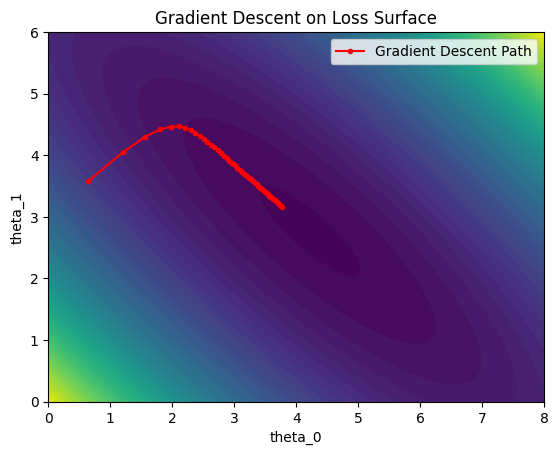

In [20]:
theta0_path = [t[0, 0] for t in theta_history]
theta1_path = [t[1, 0] for t in theta_history]

plt.contourf(theta0_vals, theta1_vals, loss_surface.T, levels=50, cmap="viridis")
plt.plot(theta0_path, theta1_path, "r.-", label="Gradient Descent Path")
plt.xlabel("theta_0")
plt.ylabel("theta_1")
plt.legend()
plt.title("Gradient Descent on Loss Surface")
plt.show()

In [21]:
eta = 1.0  # too large
theta = np.random.randn(2, 1)

loss_history_bad = []

for iteration in range(20):
    y_pred = X_b @ theta
    gradients = (2 / m) * X_b.T @ (y_pred - y)
    theta = theta - eta * gradients
    loss_history_bad.append(mse(y, y_pred))

loss_history_bad

[np.float64(54.42286330847407),
 np.float64(525.9649131608602),
 np.float64(5145.853460304544),
 np.float64(50408.06918472939),
 np.float64(493853.1287700238),
 np.float64(4838393.30762972),
 np.float64(47402920.5963562),
 np.float64(464418049.61221814),
 np.float64(4550017700.420526),
 np.float64(44577641029.28069),
 np.float64(436738098806.9082),
 np.float64(4278830430416.19),
 np.float64(41920752740139.06),
 np.float64(410707911631172.94),
 np.float64(4023806292841926.5),
 np.float64(3.942221862249952e+16),
 np.float64(3.8622915916325414e+17),
 np.float64(3.783981942173508e+18),
 np.float64(3.707260055070812e+19),
 np.float64(3.632093737748983e+20)]

In [22]:
theta_bgd = np.random.randn(2, 1)
eta = 0.1
n_iterations = 50

loss_bgd = []

for iteration in range(n_iterations):
    y_pred = X_b @ theta_bgd
    gradients = (2 / m) * X_b.T @ (y_pred - y)
    theta_bgd -= eta * gradients
    loss_bgd.append(mse(y, y_pred))

In [23]:
theta_sgd = np.random.randn(2, 1)
eta = 0.1
n_epochs = 20

loss_sgd = []

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        y_pred_i = xi @ theta_sgd
        gradients = 2 * xi.T @ (y_pred_i - yi)
        theta_sgd -= eta * gradients
        
        loss_sgd.append(mse(y, X_b @ theta_sgd))

In [24]:
theta_mbgd = np.random.randn(2, 1)
eta = 0.1
batch_size = 20
n_epochs = 20

loss_mbgd = []

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        
        gradients = (2 / len(xi)) * xi.T @ (xi @ theta_mbgd - yi)
        theta_mbgd -= eta * gradients
        
        loss_mbgd.append(mse(y, X_b @ theta_mbgd))

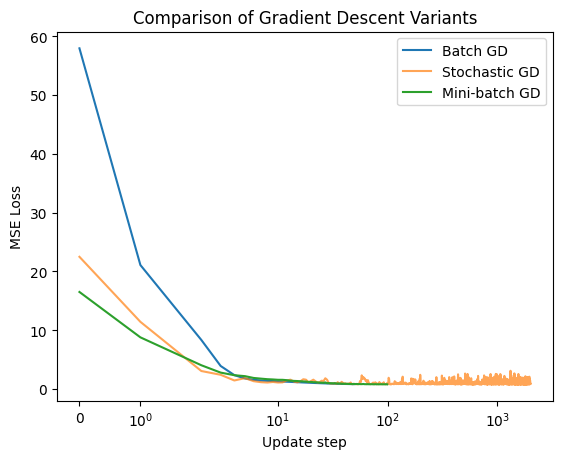

In [25]:
plt.plot(loss_bgd, label="Batch GD")
plt.plot(loss_sgd, label="Stochastic GD", alpha=0.7)
plt.plot(loss_mbgd, label="Mini-batch GD")
plt.xlabel("Update step")
plt.ylabel("MSE Loss")
plt.xscale("symlog")
plt.legend()
plt.title("Comparison of Gradient Descent Variants")
plt.show()

In [26]:
theta_lr_decay = np.random.randn(2, 1)
n_iterations = 100
eta0 = 0.2
k = 0.05

loss_lr_decay = []

for iteration in range(n_iterations):
    eta = eta0 / (1 + k * iteration)
    
    y_pred = X_b @ theta_lr_decay
    gradients = (2 / m) * X_b.T @ (y_pred - y)
    theta_lr_decay -= eta * gradients
    
    loss_lr_decay.append(mse(y, y_pred))


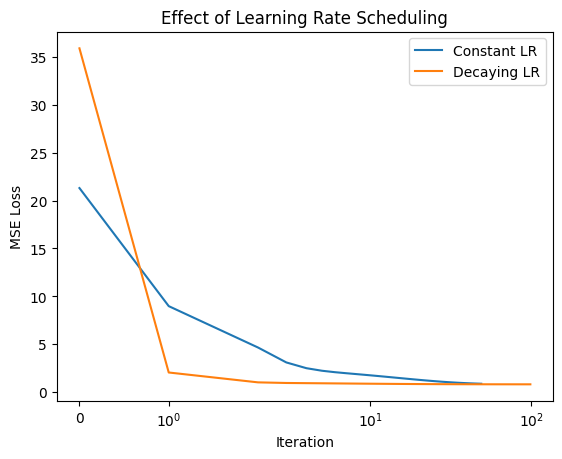

In [30]:
plt.plot(loss_history, label="Constant LR")
plt.plot(loss_lr_decay, label="Decaying LR")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.xscale("symlog")
plt.legend()
plt.title("Effect of Learning Rate Scheduling")
plt.show()


In [31]:
theta_normal = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_normal


array([[4.21509616],
       [2.77011339]])

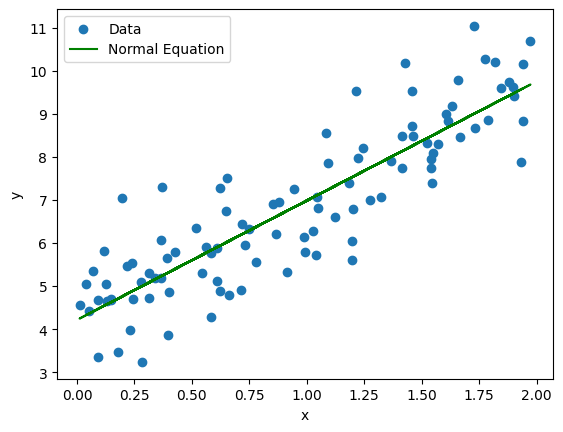

In [32]:
y_pred_normal = X_b @ theta_normal

plt.scatter(X, y, label="Data")
plt.plot(X, y_pred_normal, color="green", label="Normal Equation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
